Week 6 Mini-project
by Jeff Puuri
for EdX course DSE200x - Python for Data Science

References:
Slide Template: https://docs.google.com/presentation/d/1CAXnIH7ctHePs-TVeWVKafB9c1-mxmdEKE8_ntzY_M0/edit#slide=id.g1e0c2d5179_0_5
Mini-Project Description page: https://courses.edx.org/courses/course-v1:UCSanDiegoX+DSE200x+1T2018/courseware/82d46c5420924002ab6738f6c33aea53/77277bfa5b904ac79099930f7369dd18/1?activate_block_id=block-v1%3AUCSanDiegoX%2BDSE200x%2B1T2018%2Btype%40html%2Bblock%40a7c4de0902c3413abef80f135201c19c

Data Exploration to figure out a project...

Pick a dataset: I'm a GIS guy, so it needs to be world indicators

Lots of variables, so find a couple to be of interest and value for a study

In [1]:
# Using NBs from wk 5, import the libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the data once injto a dataframe named df, it is a big dataset
df = pd.read_csv('D:/PjtData/4_PD/edX_DSE200x/wk5_Matplotlib/Indicators.csv')
df.shape

(5656458, 6)

In [3]:
# Here's the list of columns to use for future filters
df.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

In [4]:
# Variables are going to be in the IndicatorName column, so look at what is available
# via .unique() which produces a numpy ndarray, so must cast back to pandas dataframe
# to export to excel so that I can see the list 
indicator_list = pd.DataFrame(df['IndicatorName'].unique())
type(indicator_list)

pandas.core.frame.DataFrame

In [5]:
# Send to Excel for interactive filter and sort tools to find interesting variables to study
# Comment this out once variable are decided because we don't need to regenerate the spreadsheet time after time,
# but leave it here so others can see the methodology and tools used during data exploration
#indicator_list.to_excel('D:/PjtData/4_PD/edX_DSE200x/wk5_Matplotlib/Indicators.xlsx', sheet_name='Indicators')

After review in Excel, going with:
* Renewable internal freshwater resources per capita (cubic meters)
* GDP per capita (current US\$), or maybe
* Adjusted net national income per capita (current US$)

Because it is reported there is a water crisis in developing countries,
I would like to see the disparity in terms of: per capita GDP or income

It appears that the indicator for Renewable internal freshwater resources is not reported every year.
Therefore we will examine an early year and a more recent year in which this indicator was reported: 1972 and 2012.

In [6]:
# Set the strings for the indicator variables we'll be using
h2oInd = 'Renewable internal freshwater resources per capita (cubic meters)'
incInd = 'Adjusted net national income per capita (current US$)'
gdpInd = 'GDP per capita (current US$)'
# Create a tuple of the two years during which the water indicator was reported
rptyrs = (1972, 2012)

# DF masks for the three indicator variables we'll be examining
h2oMask = df['IndicatorName'] == h2oInd
incMask = df['IndicatorName'] == incInd
gdpMask = df['IndicatorName'] == gdpInd

# Create dictionaries of DFs for each indicator for each yr
dfh2oyr = {}
dfincyr = {}
dfgdpyr = {}

for rptyr in rptyrs:
    yrMask = df['Year'] == rptyr
    
    dfh2oyr[rptyr] = df[(yrMask) & (h2oMask)]
    dfincyr[rptyr] = df[(yrMask) & (incMask)]
    dfgdpyr[rptyr] = df[(yrMask) & (gdpMask)]
    print(rptyr, dfh2oyr[rptyr].count(), dfincyr[rptyr].count(), dfgdpyr[rptyr].count())

1972 CountryName      180
CountryCode      180
IndicatorName    180
IndicatorCode    180
Year             180
Value            180
dtype: int64 CountryName      129
CountryCode      129
IndicatorName    129
IndicatorCode    129
Year             129
Value            129
dtype: int64 CountryName      153
CountryCode      153
IndicatorName    153
IndicatorCode    153
Year             153
Value            153
dtype: int64
2012 CountryName      209
CountryCode      209
IndicatorName    209
IndicatorCode    209
Year             209
Value            209
dtype: int64 CountryName      202
CountryCode      202
IndicatorName    202
IndicatorCode    202
Year             202
Value            202
dtype: int64 CountryName      225
CountryCode      225
IndicatorName    225
IndicatorCode    225
Year             225
Value            225
dtype: int64


In [7]:
# Create dictionaries of dataframes resulting from merging df of water with each of the two wealth variables
dfh2oinc = {}
dfh2ogdp = {}
for rptyr in rptyrs:
    dfh2oinc[rptyr] = dfh2oyr[rptyr].merge(dfincyr[rptyr], on=['CountryCode'],how='left')
    dfh2ogdp[rptyr] = dfh2oyr[rptyr].merge(dfgdpyr[rptyr], on=['CountryCode'],how='left')
dfh2oinc[rptyrs[0]].head()

,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryName_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y
0,Arab World,ARB,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,1018.386484,NaN,NaN,NaN,NaN,NaN
1,Caribbean small states,CSS,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,77322.745771,Caribbean small states,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1972.0,805.715154
2,Central Europe and the Baltics,CEB,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,1690.781140,NaN,NaN,NaN,NaN,NaN
3,East Asia & Pacific (all income levels),EAS,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,7565.189613,East Asia & Pacific (all income levels),Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1972.0,362.267143
4,East Asia & Pacific (developing only),EAP,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,7463.472622,East Asia & Pacific (developing only),Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,1972.0,115.433579


In [8]:
# Create dfs of previous with na values removed
dfh2oinc_notna = {}
dfh2ogdp_notna = {}
for rptyr in rptyrs:
    dfh2oinc_notna[rptyr] = dfh2oinc[rptyr][dfh2oinc[rptyr]['CountryName_y'].notna()]
    dfh2ogdp_notna[rptyr] = dfh2ogdp[rptyr][dfh2ogdp[rptyr]['CountryName_y'].notna()]
dfh2ogdp_notna[rptyrs[0]].head()

,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryName_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y
0,Arab World,ARB,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,1018.386484,Arab World,GDP per capita (current US$),NY.GDP.PCAP.CD,1972.0,333.235847
1,Caribbean small states,CSS,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,77322.745771,Caribbean small states,GDP per capita (current US$),NY.GDP.PCAP.CD,1972.0,943.824568
3,East Asia & Pacific (all income levels),EAS,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,7565.189613,East Asia & Pacific (all income levels),GDP per capita (current US$),NY.GDP.PCAP.CD,1972.0,410.692798
4,East Asia & Pacific (developing only),EAP,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,7463.472622,East Asia & Pacific (developing only),GDP per capita (current US$),NY.GDP.PCAP.CD,1972.0,130.858703
5,Euro area,EMU,Renewable internal freshwater resources per ca...,ER.H2O.INTR.PC,1972,3359.401872,Euro area,GDP per capita (current US$),NY.GDP.PCAP.CD,1972.0,3019.343670


In [9]:
# Compute correlations
corrh2oinc = {}
corrh2ogdp = {}
for rptyr in rptyrs:
    corrh2oinc[rptyr] = dfh2oinc_notna[rptyr]['Value_x'].corr(dfh2oinc_notna[rptyr]['Value_y'])
    corrh2ogdp[rptyr] = dfh2ogdp_notna[rptyr]['Value_x'].corr(dfh2ogdp_notna[rptyr]['Value_y'])

corrh2oinc, corrh2ogdp

({1972: -0.0710226095741211, 2012: 0.08639238000373058},
 {1972: 0.0686811397001213, 2012: 0.08209193071844664})

In [10]:
%matplotlib inline

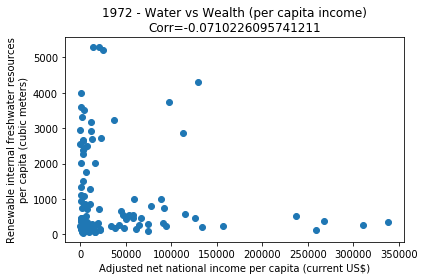

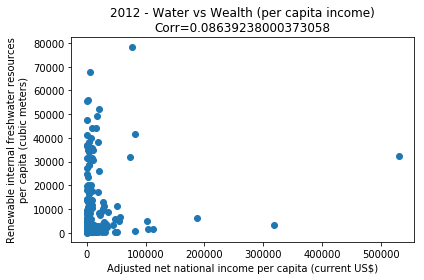

In [11]:
# Generate scatter plots for water vs per capita income for the report years
for rptyr in rptyrs:
    plt.scatter(dfh2oinc_notna[rptyr]['Value_x'],dfh2oinc_notna[rptyr]['Value_y'])
    # Label the axes
    plt.xlabel('Adjusted net national income per capita (current US$)')
    plt.ylabel('Renewable internal freshwater resources\nper capita (cubic meters)')

    #label the figure
    plt.title('{0} - Water vs Wealth (per capita income)\nCorr={1}'.format(str(rptyr),str(corrh2oinc[rptyr])))
    plt.tight_layout()
    plt.savefig('D:/PjtData/4_PD/edX_DSE200x/wk6_MiniPrj/{0}.png'.format('plth2oinc'+str(rptyr)))
    plt.show()

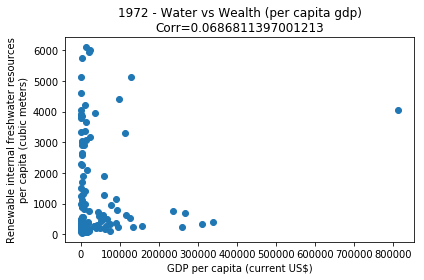

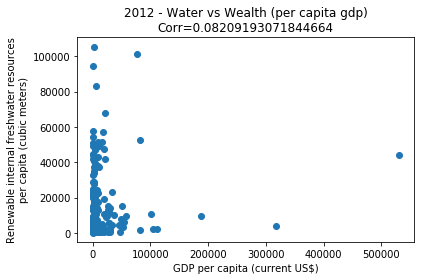

In [12]:
# Generate scatter plots for water vs per capita gdp for the report years
for rptyr in rptyrs:
    plt.scatter(dfh2ogdp_notna[rptyr]['Value_x'],dfh2ogdp_notna[rptyr]['Value_y'])
    # Label the axes
    plt.xlabel('GDP per capita (current US$)')
    plt.ylabel('Renewable internal freshwater resources\nper capita (cubic meters)')

    #label the figure
    plt.title('{0} - Water vs Wealth (per capita gdp)\nCorr={1}'.format(str(rptyr),str(corrh2ogdp[rptyr])))
    plt.tight_layout()
    plt.savefig('D:/PjtData/4_PD/edX_DSE200x/wk6_MiniPrj/{0}.png'.format('plth2ogdp'+str(rptyr)))
    plt.show()